In [1]:
import pandas as pd
from scapy.all import *
import matplotlib.pyplot as plt

pcap = rdpcap("analisis_paquetes.pcap")

In [2]:
packets = sniff(count= 10) + pcap

In [3]:

packetsData = []

for pkt in packets:
    packetInfo = {}
    
    if pkt.haslayer(UDP):
        packetInfo["sourcePort"] = pkt[UDP].sport
        packetInfo["destinationPort"] = pkt[UDP].dport
        packetInfo["messageLength"] = len(pkt[UDP].payload)

    elif pkt.haslayer(TCP):
        packetInfo["sourcePort"] = pkt[TCP].sport
        packetInfo["destinationPort"] = pkt[TCP].dport
        packetInfo["messageLength"] = len(pkt[TCP].payload)
    
    packetInfo["source"] = pkt[IP].src
    packetInfo["destination"] = pkt[IP].dst
    
    packetsData.append(packetInfo)
 
df = pd.DataFrame(packetsData)
df.head()  

,sourcePort,destinationPort,messageLength,source,destination
0,57733,443,0,172.10.10.187,52.168.117.169
1,57734,443,0,172.10.10.187,52.168.117.169
2,57735,443,0,172.10.10.187,52.168.117.169
3,443,57733,0,52.168.117.169,172.10.10.187
4,57733,443,0,172.10.10.187,52.168.117.169


In [4]:
popularSource = df["source"].value_counts().idxmax()
popularDestionation = df["destination"].value_counts().idxmax()

print("Direccion origen mas frecuente", popularSource)
print("Direccion destino mas frecuente", popularDestionation)

Direccion origen mas frecuente 10.1.10.53
Direccion destino mas frecuente 10.1.10.53


In [5]:
filtered = df[df["source"] == popularSource]
print(filtered[["source", "destination", "destinationPort"]])

        source  destination  destinationPort
10  10.1.10.53  84.54.22.33               53
12  10.1.10.53  84.54.22.33               53
14  10.1.10.53  84.54.22.33               53
16  10.1.10.53  84.54.22.33               53
18  10.1.10.53  84.54.22.33               53
20  10.1.10.53  84.54.22.33               53
22  10.1.10.53  84.54.22.33               53
24  10.1.10.53  84.54.22.33               53
26  10.1.10.53  84.54.22.33               53
28  10.1.10.53  84.54.22.33               53
30  10.1.10.53  84.54.22.33               53
32  10.1.10.53  75.75.75.75               53
33  10.1.10.53  75.75.75.75               53
36  10.1.10.53  84.54.22.33               53
38  10.1.10.53  84.54.22.33               53
40  10.1.10.53  84.54.22.33               53
42  10.1.10.53  84.54.22.33               53
44  10.1.10.53  84.54.22.33               53
46  10.1.10.53  84.54.22.33               53
48  10.1.10.53  84.54.22.33               53
50  10.1.10.53  84.54.22.33               53
52  10.1.1

In [6]:
filtered = df[df["destination"] == popularSource]
print(filtered[["source", "destination", "destinationPort"]])

         source destination  destinationPort
11  84.54.22.33  10.1.10.53               53
13  84.54.22.33  10.1.10.53               53
15  84.54.22.33  10.1.10.53               53
17  84.54.22.33  10.1.10.53               53
19  84.54.22.33  10.1.10.53               53
21  84.54.22.33  10.1.10.53               53
23  84.54.22.33  10.1.10.53               53
25  84.54.22.33  10.1.10.53               53
27  84.54.22.33  10.1.10.53               53
29  84.54.22.33  10.1.10.53               53
31  84.54.22.33  10.1.10.53               53
34  75.75.75.75  10.1.10.53            15812
35  75.75.75.75  10.1.10.53            23903
37  84.54.22.33  10.1.10.53               53
39  84.54.22.33  10.1.10.53               53
41  84.54.22.33  10.1.10.53               53
43  84.54.22.33  10.1.10.53               53
45  84.54.22.33  10.1.10.53               53
47  84.54.22.33  10.1.10.53               53
49  84.54.22.33  10.1.10.53               53
51  84.54.22.33  10.1.10.53               53
53  84.54.

Permite crear la conexion entre el cliente y servidor, traduciendo el nombre de dominio a un legible por ip realizando dichas tareas a traves del puerto 53.

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_996\1965302509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(["source"]).sum()


Text(0, 0.5, 'Source')

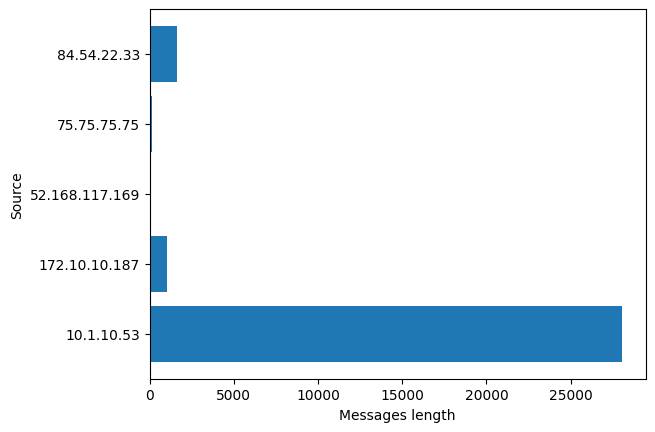

In [7]:
grouped = df.groupby(["source"]).sum()
plt.barh(grouped.index, grouped["messageLength"])
plt.xlabel("Messages length")
plt.ylabel("Source")

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_996\1991463383.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(["destination"]).sum()


Text(0, 0.5, 'Destination')

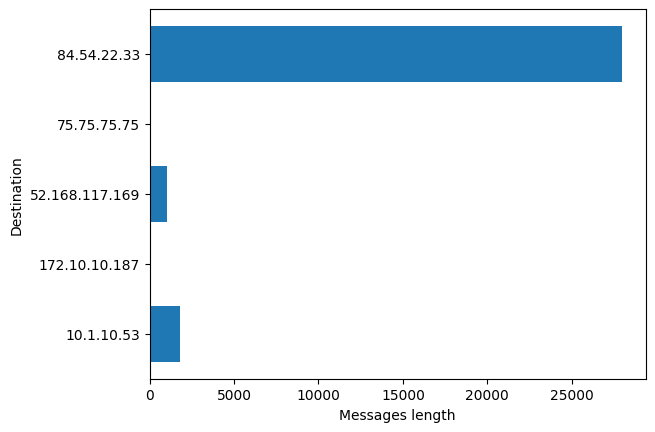

In [8]:
grouped = df.groupby(["destination"]).sum()
plt.barh(grouped.index, grouped["messageLength"])
plt.xlabel("Messages length")
plt.ylabel("Destination")

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_996\1281391196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(["sourcePort"]).sum()


Text(0, 0.5, 'Origin port')

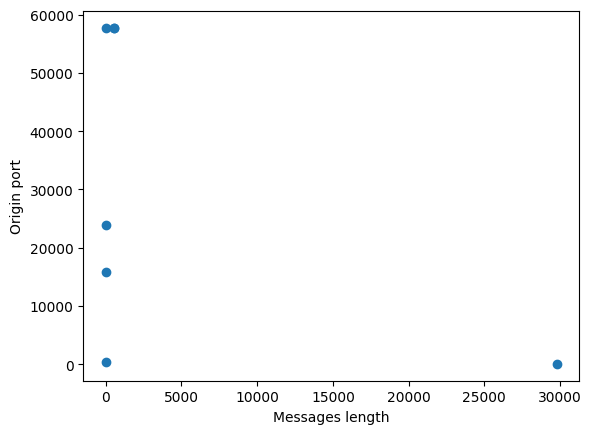

In [9]:
grouped = df.groupby(["sourcePort"]).sum()
plt.scatter(grouped["messageLength"], grouped.index)
plt.xlabel("Messages length")
plt.ylabel("Origin port")

C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_996\3265121408.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(["destinationPort"]).sum()


Text(0, 0.5, 'Destination Port')

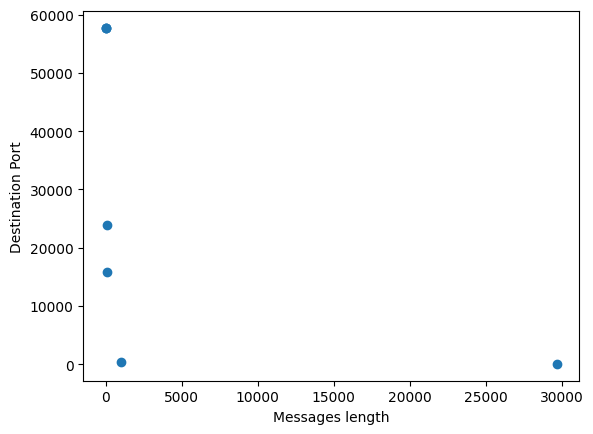

In [10]:
grouped = df.groupby(["destinationPort"]).sum()
plt.scatter(grouped["messageLength"], grouped.index)
plt.xlabel("Messages length")
plt.ylabel("Destination Port")

In [11]:
filtered = df[df["source"] == popularSource]
payload_filter = filtered["messageLength"].unique()
filtered[filtered["messageLength"] == max(payload_filter)]

,sourcePort,destinationPort,messageLength,source,destination
30,53,53,1023,10.1.10.53,84.54.22.33


In [12]:
array_max_payload = None

for packet in pcap:
    if packet.haslayer(UDP):
            if array_max_payload == None and len(packet[UDP].payload) == max(payload_filter):
                array_max_payload = packet[Raw].load
    elif packet.haslayer(TCP):
        if  array_max_payload == None and len(packet[TCP].payload) == max(payload_filter):
            array_max_payload = packet[Raw].load

In [13]:
array_max_payload

b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd<>}\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd%\xef\xbf\xbd\xef\xbf\xbdR\xef\xbf\xbdA\x08\xef\xbf\xbd\xef\xbf\xbdt\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\\\x07@c\xef\xbf\xbd-\xef\xbf\xbdG\xef\xbf\xbd9\xef\xbf\xbdu9\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdE%wq\xef\xbf\xbd\xef\xbf\xbd\x0f\x0e\xef\xbf\xbd\xef\xbf\xbdo\xef\xbf\xbd\xef\xbf\xbdc\xef\xbf\xbd.\xef\xbf\xbd8\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdg\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\n!\xef\xbf\xbd\xef\xbf\xbd.\xef\xbf\xbd|\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x04\xef\xbf\xbdp\xef\xbf\xbd&:\xef\xbf\xbdb=\x16\x0f\x14c\xef\xbf\xbd\xef\xbf\xbdd\xef\xbf\xbd<\xef\xbf\xbd\xef\xbf\xbdW\xef\xbf\xbd\x08\x1b\xe5\x96\x8eM\x1e\xef\xbf\xbd\xef\xbf\xbdR\xde\x97\xef\xbf\xbd\xef\xbf\xbd\\2\xe9\xa0\x8bB\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd^"+#m>r\x0cR\x16\x08)\x1f(,\xef\xbf\xbd\xef\xbf\xbd\x1d9\x07\xef\xbf\xbds\x1f\xef\xbf\xbd\r\xef\xbf\xbd\xef\xbf\xbdR\xef\xbf\xbd\'\x18~\xef\xbf\xbd\xef\xbf\xbd\x07\xef\x

In [14]:
array_max_payload.decode("utf-8")

'���<>}���%��R�A\x08��t���\\\x07@c�-�G�9�u9���E%wq��\x0f\x0e��o��c�.�8���g���\n!��.�|���\x04�p�&:�b=\x16\x0f\x14c��d�<��W�\x08\x1b喎M\x1e��Rޗ��\\2頋B�����^"+#m>r\x0cR\x16\x08)\x1f(,��\x1d9\x07�s\x1f�\r��R�\'\x18~��\x07��^(:�ѥ�Q�\x19�v:"��g���tX"�YZG����pǤ�\x0br�+�F��j\x05\u2e7dg��\x1cO1��%݇ލ��"LI��$�\x07�%�.b]3!�E�k*\x1d\x06�=\x04�@@�\x14��}�5�`�����)��ɜd\x11��\x14=ի\x162�cȰ�\x07g\x15���K&\x11�b��\x02����<@3\x11�TD;��%u�L�.,.}�K��\\}��m1��Ej��\x15�]�������\r͡�L�:ߴ�b��;��1�v�\x10�VR��"kq���\x03�ǧ7\x03���5�0)����\x1a~��\x1f\x0f7ľ3v���C�\x1c}j�&�B�y�/\x00BA\x7f��$���\x10XjSI����S�\\t�{�P�i\x02�焀�B����ϱ�\x1eQ�~�q���\x03\x07�kƱ��K/�4�)R*\x15�c�������U��҇\x08�"��\x14�\x18���~\x16��C3�'

Como se puede observar en la celda anterior, el resultado de los bytes enviados desde la IP origen mas frecuente a la IP destiono mas frecuente contiene en su mayoria caracteres extraños, es decir, no usuales como caracteres que pertenezcan al alfabeto o que sean digitos.